<a href="https://colab.research.google.com/github/Richardjmorton/colab/blob/master/mnist_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist


In [5]:
(x_train, ytrain), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


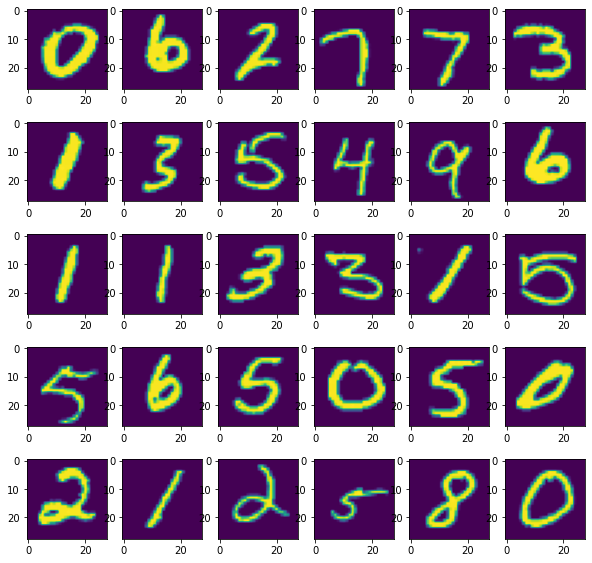

In [41]:
fig, ax = plt.subplots(5,6, figsize=(10,10))

x = stats.uniform.rvs(scale=60000, size=30)
x = x.astype(int)
for axes, j in zip(ax.flatten(), x):
    axes.imshow(x_train[j,:,:])

In [40]:
x_train.shape

(60000, 28, 28)

In [25]:
type(7 // 5)

int